Plots generated successfully.


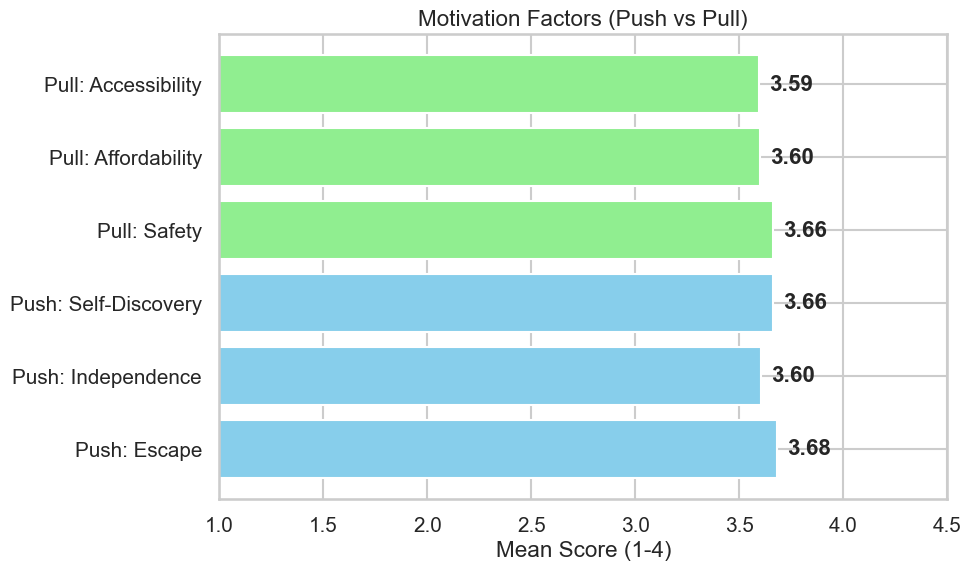

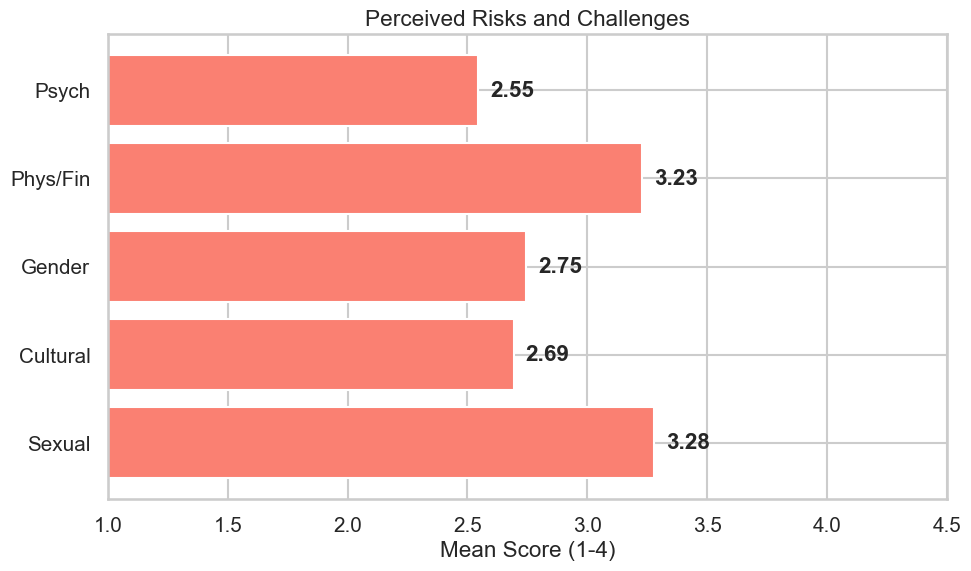

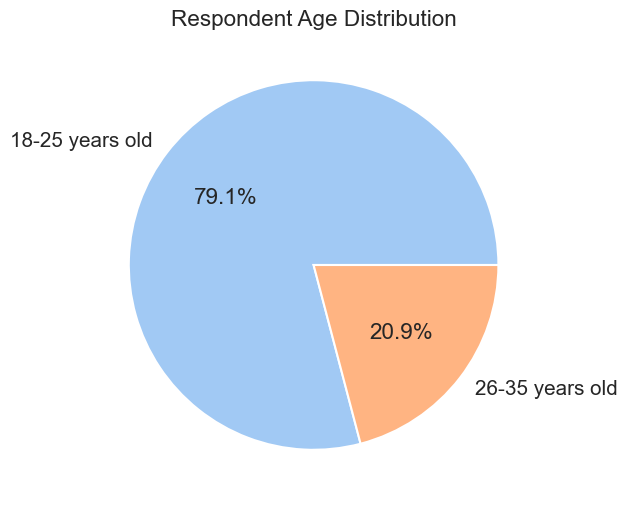

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set aesthetics
sns.set_theme(style="whitegrid", context="talk", font_scale=0.9)
plt.rcParams['figure.figsize'] = (12, 6)

# Load Data
file_path = "SOLO-FEMALE-TRAVELER-SURVEY-Responses.csv"
df = pd.read_csv(file_path)

# --- DATA CLEANING ---
def extract_score(val):
    if isinstance(val, str):
        try:
            return int(val.split('-')[0].strip())
        except:
            return np.nan
    return val

# Identify Likert columns
likert_cols = [c for c in df.columns if "Factors" in c or "Risks" in c]
for col in likert_cols:
    df[col] = df[col].apply(extract_score)

# --- VARIABLE MAPPING ---
# Push Factors
push_escape = [c for c in df.columns if "Push Factors" in c and any(x in c for x in ['6.', '7.', '8.'])]
push_indep = [c for c in df.columns if "Push Factors" in c and any(x in c for x in ['9.', '10.', '11.'])]
push_self = [c for c in df.columns if "Push Factors" in c and any(x in c for x in ['12.', '13.', '14.'])]

# Pull Factors
pull_safety = [c for c in df.columns if "Pull Factors" in c and any(x in c for x in ['16.', '17.'])]
pull_afford = [c for c in df.columns if "Pull Factors" in c and any(x in c for x in ['18.', '19.', '20.'])]
pull_access = [c for c in df.columns if "Pull Factors" in c and any(x in c for x in ['15.', '21.', '22.', '23.'])]

# Challenges
risk_cols = {
    'Sexual': [c for c in df.columns if "Sexual-Related" in c],
    'Cultural': [c for c in df.columns if "Cultural" in c],
    'Gender': [c for c in df.columns if "Gender-Related" in c],
    'Phys/Fin': [c for c in df.columns if "Physical and Financial" in c],
    'Psych': [c for c in df.columns if "Psychological" in c]
}

# --- CALCULATIONS ---
# Means per category
motivations = {
    'Push: Escape': df[push_escape].mean().mean(),
    'Push: Independence': df[push_indep].mean().mean(),
    'Push: Self-Discovery': df[push_self].mean().mean(),
    'Pull: Safety': df[pull_safety].mean().mean(),
    'Pull: Affordability': df[pull_afford].mean().mean(),
    'Pull: Accessibility': df[pull_access].mean().mean()
}

challenges = {k: df[v].mean().mean() for k, v in risk_cols.items()}

# --- PLOTTING ---

# 1. Motivations Plot
plt.figure(figsize=(10, 6))
colors = ['skyblue' if 'Push' in k else 'lightgreen' for k in motivations.keys()]
bars = plt.barh(list(motivations.keys()), list(motivations.values()), color=colors)
plt.title('Motivation Factors (Push vs Pull)')
plt.xlabel('Mean Score (1-4)')
plt.xlim(1, 4.5)
# Add labels
for i, v in enumerate(motivations.values()):
    plt.text(v + 0.05, i, f"{v:.2f}", va='center', fontweight='bold')
plt.tight_layout()
plt.savefig('motivations_chart.png')

# 2. Challenges Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(list(challenges.keys()), list(challenges.values()), color='salmon')
plt.title('Perceived Risks and Challenges')
plt.xlabel('Mean Score (1-4)')
plt.xlim(1, 4.5)
# Add labels
for i, v in enumerate(challenges.values()):
    plt.text(v + 0.05, i, f"{v:.2f}", va='center', fontweight='bold')
plt.tight_layout()
plt.savefig('challenges_chart.png')

# 3. Demographics: Age Pie Chart
plt.figure(figsize=(6, 6))
age_counts = df['1. Age:'].value_counts()
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Respondent Age Distribution')
plt.savefig('age_demographics.png')

print("Plots generated successfully.")

Data Loaded Successfully.

--- STATISTICAL SUMMARY ---
                     Variable   Mean     SD
0                Push: Escape  3.682  0.420
1          Push: Independence  3.603  0.453
2        Push: Self-Discovery  3.664  0.425
3                Pull: Safety  3.664  0.494
4         Pull: Affordability  3.600  0.447
5         Pull: Accessibility  3.593  0.421
6     Challenge: Sexual Risks  3.279  0.612
7   Challenge: Cultural Risks  2.694  0.621
8     Challenge: Gender Risks  2.745  0.721
9   Challenge: Phys/Fin Risks  3.227  0.515
10     Challenge: Psych Risks  2.545  0.767


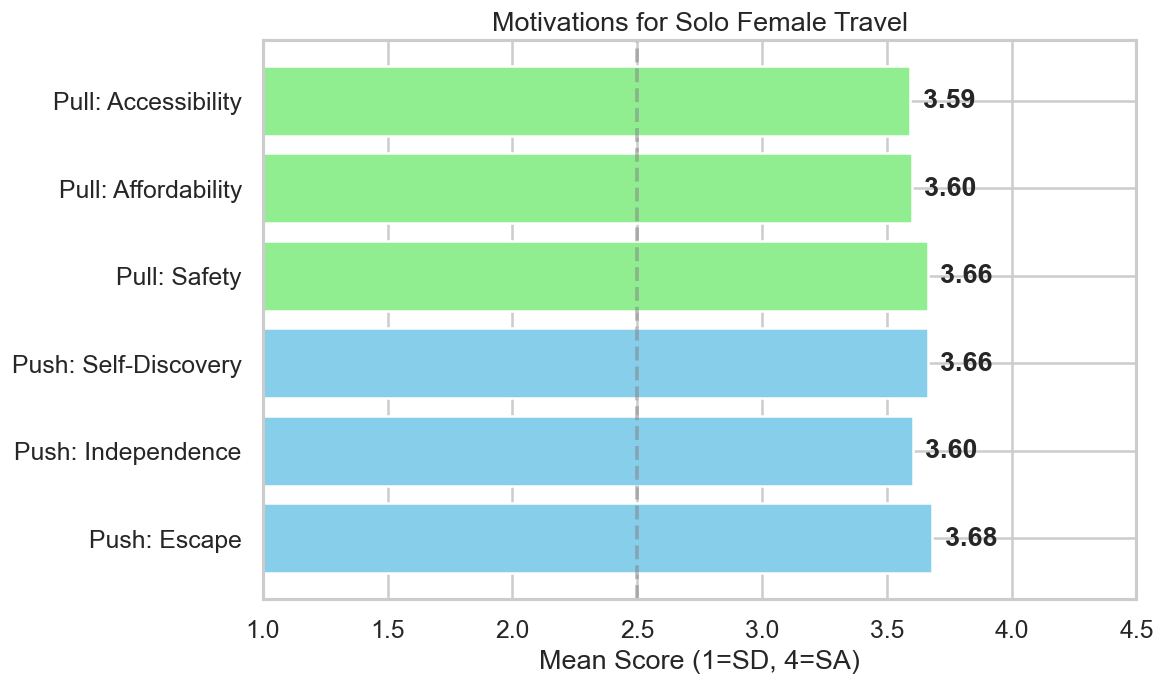

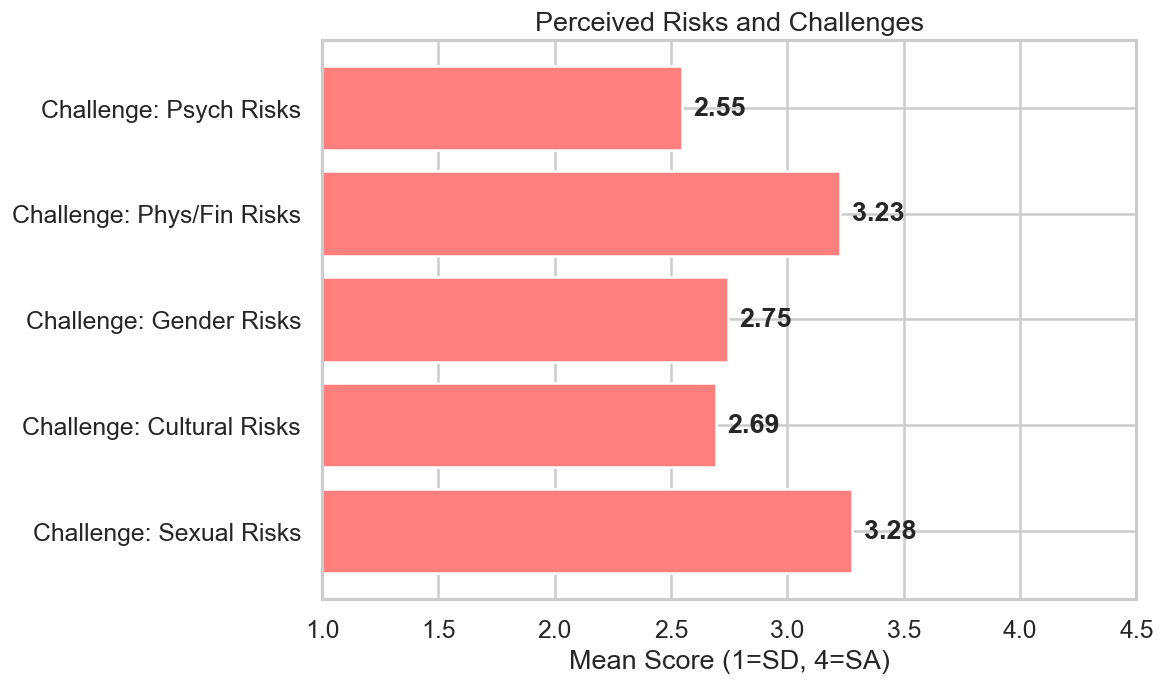

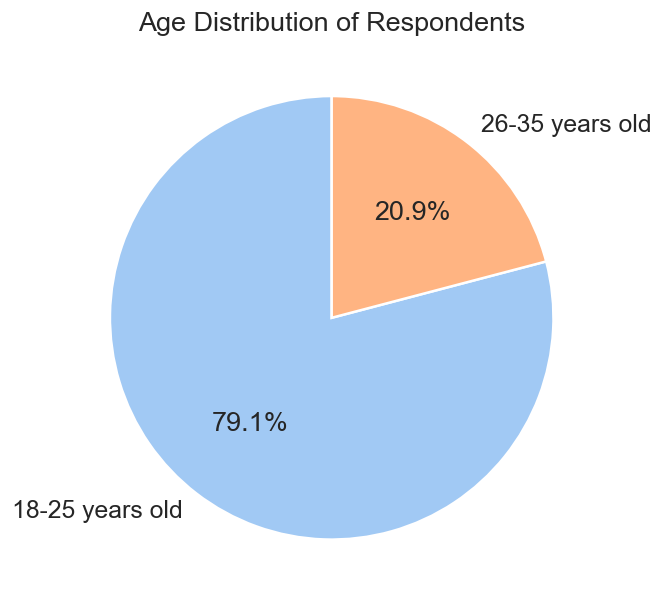

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------------------------------
# 1. CONFIGURATION & SETUP
# -------------------------------------------------------------------------
# Set plot style for academic reporting
sns.set_theme(style="whitegrid", context="talk", font_scale=0.9)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 120

# -------------------------------------------------------------------------
# 2. DATA LOADING & CLEANING
# -------------------------------------------------------------------------
file_path = "SOLO-FEMALE-TRAVELER-SURVEY-Responses.csv"
try:
    df = pd.read_csv(file_path)
    print("Data Loaded Successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")

# Function to extract numeric score from strings like "4 - Strongly Agree"
def extract_score(val):
    if isinstance(val, str):
        try:
            # Splits "4 - Strongly Agree" and takes the first part "4"
            return int(val.split('-')[0].strip())
        except:
            return np.nan
    return val

# Apply cleaning to all Likert Scale columns (Questions with "Factors" or "Risks")
likert_cols = [c for c in df.columns if "Factors" in c or "Risks" in c]
for col in likert_cols:
    df[col] = df[col].apply(extract_score)

# -------------------------------------------------------------------------
# 3. VARIABLE GROUPING (Based on SOP)
# -------------------------------------------------------------------------
# Push Factors (Internal Motivation)
push_escape = [c for c in df.columns if "Push Factors" in c and any(x in c for x in ['6.', '7.', '8.'])]
push_indep  = [c for c in df.columns if "Push Factors" in c and any(x in c for x in ['9.', '10.', '11.'])]
push_self   = [c for c in df.columns if "Push Factors" in c and any(x in c for x in ['12.', '13.', '14.'])]

# Pull Factors (External Attributes)
pull_safety = [c for c in df.columns if "Pull Factors" in c and any(x in c for x in ['16.', '17.'])]
pull_afford = [c for c in df.columns if "Pull Factors" in c and any(x in c for x in ['18.', '19.', '20.'])]
pull_access = [c for c in df.columns if "Pull Factors" in c and any(x in c for x in ['15.', '21.', '22.', '23.'])]

# Challenges / Risks
risks = {
    'Sexual Risks': [c for c in df.columns if "Sexual-Related" in c],
    'Cultural Risks': [c for c in df.columns if "Cultural" in c],
    'Gender Risks': [c for c in df.columns if "Gender-Related" in c],
    'Phys/Fin Risks': [c for c in df.columns if "Physical and Financial" in c],
    'Psych Risks': [c for c in df.columns if "Psychological" in c]
}

# -------------------------------------------------------------------------
# 4. STATISTICAL CALCULATIONS
# -------------------------------------------------------------------------
def get_stats(cols, label):
    mean_val = df[cols].mean().mean()
    std_val = df[cols].mean(axis=1).std()
    return {'Variable': label, 'Mean': mean_val, 'SD': std_val}

stats_list = []
stats_list.append(get_stats(push_escape, "Push: Escape"))
stats_list.append(get_stats(push_indep, "Push: Independence"))
stats_list.append(get_stats(push_self, "Push: Self-Discovery"))
stats_list.append(get_stats(pull_safety, "Pull: Safety"))
stats_list.append(get_stats(pull_afford, "Pull: Affordability"))
stats_list.append(get_stats(pull_access, "Pull: Accessibility"))

# Add Risks
for name, cols in risks.items():
    stats_list.append(get_stats(cols, f"Challenge: {name}"))

results_df = pd.DataFrame(stats_list)

print("\n--- STATISTICAL SUMMARY ---")
print(results_df.round(3))

# -------------------------------------------------------------------------
# 5. VISUALIZATION
# -------------------------------------------------------------------------

# Plot 1: Motivations (Push vs Pull)
motivations = results_df[results_df['Variable'].str.contains("Push|Pull")]
plt.figure(figsize=(10, 6))
colors = ['#87CEEB' if 'Push' in x else '#90EE90' for x in motivations['Variable']] # Blue for Push, Green for Pull

bars = plt.barh(motivations['Variable'], motivations['Mean'], color=colors)
plt.title('Motivations for Solo Female Travel')
plt.xlabel('Mean Score (1=SD, 4=SA)')
plt.xlim(1, 4.5)
plt.axvline(x=2.5, color='gray', linestyle='--', alpha=0.5) # Neutral line

# Add value labels
for bar in bars:
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
             f"{bar.get_width():.2f}", va='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Plot 2: Challenges
challenges = results_df[results_df['Variable'].str.contains("Challenge")]
plt.figure(figsize=(10, 6))
bars = plt.barh(challenges['Variable'], challenges['Mean'], color='#FF7F7F') # Red for Danger/Challenge
plt.title('Perceived Risks and Challenges')
plt.xlabel('Mean Score (1=SD, 4=SA)')
plt.xlim(1, 4.5)

for bar in bars:
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
             f"{bar.get_width():.2f}", va='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Plot 3: Demographics (Age)
plt.figure(figsize=(6, 6))
age_dist = df['1. Age:'].value_counts()
plt.pie(age_dist, labels=age_dist.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Age Distribution of Respondents')
plt.show()

In [7]:
import pandas as pd
import numpy as np

# -------------------------------------------------------------------------
# 1. SETUP & DATA LOADING
# -------------------------------------------------------------------------
file_path = "SOLO-FEMALE-TRAVELER-SURVEY-Responses.csv"
try:
    df = pd.read_csv(file_path)
    print("Data Loaded Successfully.\n")
except FileNotFoundError:
    print("Error: File not found.")

# -------------------------------------------------------------------------
# 2. DATA CLEANING
# -------------------------------------------------------------------------
# Function to clean "4 - Strongly Agree" -> 4
def extract_score(val):
    if isinstance(val, str):
        try:
            return int(val.split('-')[0].strip())
        except:
            return np.nan
    return val

# Apply cleaning to all Likert columns
likert_cols = [c for c in df.columns if "Factors" in c or "Risks" in c]
for col in likert_cols:
    df[col] = df[col].apply(extract_score)

# -------------------------------------------------------------------------
# 3. INTERPRETATION LOGIC (4-Point Scale)
# -------------------------------------------------------------------------
# Range: 4 - 1 = 3. Interval: 3 / 4 = 0.75
# 1.00 - 1.75: Strongly Disagree / Very Low
# 1.76 - 2.50: Disagree / Low
# 2.51 - 3.25: Agree / High
# 3.26 - 4.00: Strongly Agree / Very High

def get_interpretation(mean_val):
    if mean_val <= 1.75:
        return "Strongly Disagree"
    elif mean_val <= 2.50:
        return "Disagree"
    elif mean_val <= 3.25:
        return "Agree"
    else:
        return "Strongly Agree"

# -------------------------------------------------------------------------
# 4. ANALYSIS FUNCTION
# -------------------------------------------------------------------------
def analyze_section(columns, section_title):
    print(f"\n{'='*80}")
    print(f"TABLE: {section_title.upper()}")
    print(f"{'='*80}")
    
    stats_data = []
    
    # Calculate Item-Level Stats
    for col in columns:
        # Clean the column name for display (Remove "Push Factors [..]")
        clean_name = col.split('[')[-1].replace(']', '') 
        
        mean = df[col].mean()
        sd = df[col].std()
        interp = get_interpretation(mean)
        
        stats_data.append([clean_name, mean, sd, interp])
    
    # Create DataFrame
    stats_df = pd.DataFrame(stats_data, columns=["Statement / Indicator", "Mean", "SD", "Interpretation"])
    
    # Calculate Composite (Overall) Score for this section
    comp_mean = df[columns].mean().mean()
    comp_sd = df[columns].mean(axis=1).std() # SD of the averages
    comp_interp = get_interpretation(comp_mean)
    
    # Add Composite Row
    composite_row = pd.DataFrame([["OVERALL COMPOSITE SCORE", comp_mean, comp_sd, comp_interp]], 
                                 columns=["Statement / Indicator", "Mean", "SD", "Interpretation"])
    
    final_df = pd.concat([stats_df, composite_row], ignore_index=True)
    
    # Print formatted table
    print(final_df.to_string(index=False, float_format="%.3f"))
    return final_df

# -------------------------------------------------------------------------
# 5. EXECUTE ANALYSIS (Mapped to SOP Objectives)
# -------------------------------------------------------------------------

# --- OBJECTIVE 2: MOTIVATIONS (PUSH) ---
push_escape = [c for c in df.columns if "Push Factors" in c and any(x in c for x in ['6.', '7.', '8.'])]
push_indep  = [c for c in df.columns if "Push Factors" in c and any(x in c for x in ['9.', '10.', '11.'])]
push_self   = [c for c in df.columns if "Push Factors" in c and any(x in c for x in ['12.', '13.', '14.'])]

analyze_section(push_escape, "Push Factor 1: Desire for Escape")
analyze_section(push_indep,  "Push Factor 2: Independence")
analyze_section(push_self,   "Push Factor 3: Self-Discovery")

# --- OBJECTIVE 2: MOTIVATIONS (PULL) ---
pull_safety = [c for c in df.columns if "Pull Factors" in c and any(x in c for x in ['16.', '17.'])]
pull_afford = [c for c in df.columns if "Pull Factors" in c and any(x in c for x in ['18.', '19.', '20.'])]
pull_access = [c for c in df.columns if "Pull Factors" in c and any(x in c for x in ['15.', '21.', '22.', '23.'])]

analyze_section(pull_safety, "Pull Factor 1: Safety & Security")
analyze_section(pull_afford, "Pull Factor 2: Affordability")
analyze_section(pull_access, "Pull Factor 3: Accessibility")

# --- OBJECTIVE 3: CHALLENGES (RISKS) ---
risks_sexual = [c for c in df.columns if "Sexual-Related" in c]
risks_cultural = [c for c in df.columns if "Cultural" in c]
risks_gender = [c for c in df.columns if "Gender-Related" in c]
risks_physfin = [c for c in df.columns if "Physical and Financial" in c]
risks_psych = [c for c in df.columns if "Psychological" in c]

analyze_section(risks_sexual, "Challenge 1: Sexual-Related Risks")
analyze_section(risks_cultural, "Challenge 2: Cultural & Societal Risks")
analyze_section(risks_gender, "Challenge 3: Gender-Related Risks")
analyze_section(risks_physfin, "Challenge 4: Physical & Financial Risks")
analyze_section(risks_psych, "Challenge 5: Psychological Risks")

Data Loaded Successfully.


TABLE: PUSH FACTOR 1: DESIRE FOR ESCAPE
                                   Statement / Indicator  Mean    SD Interpretation
           6. I travel solo to take a break from stress. 3.645 0.552 Strongly Agree
           7. Solo travel helps me recharge emotionally. 3.755 0.453 Strongly Agree
8. Traveling alone gives me space from social pressures. 3.645 0.481 Strongly Agree
                                 OVERALL COMPOSITE SCORE 3.682 0.420 Strongly Agree

TABLE: PUSH FACTOR 2: INDEPENDENCE
                                        Statement / Indicator  Mean    SD Interpretation
          9. Traveling alone lets me choose my own itinerary. 3.609 0.509 Strongly Agree
               10. I enjoy making travel decisions by myself. 3.555 0.535 Strongly Agree
11. Solo travel gives me control over my time and activities. 3.645 0.535 Strongly Agree
                                      OVERALL COMPOSITE SCORE 3.603 0.453 Strongly Agree

TABLE: PUSH FACTOR 3: SELF-DIS

,Statement / Indicator,Mean,SD,Interpretation
0,36. I feel anxious when traveling alone.,2.618182,0.856511,Agree
1,37. Loneliness affects my solo travel experience.,2.363636,0.895732,Disagree
2,38. Constant safety awareness causes me stress.,2.654545,0.828798,Agree
3,OVERALL COMPOSITE SCORE,2.545455,0.767228,Agree
